# Support Vector Machine

## 1. Outliers and C parameter in SVM

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm #SVM package

### 数据初始化

In [3]:
data1 = loadmat("data1.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
X = data1["X"]
y = data1["y"]
X.shape
y.shape

(51, 2)

(51, 1)

大多数SVM包会自动添加额外的x0和theta0，所以无需手动添加

### 数据可视化

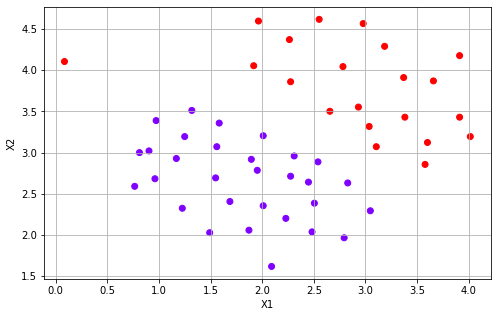

In [7]:
def plotData(X, y):
    plt.figure(figsize=(8,5))
    plt.scatter(X[:,0],X[:,1],c=y.ravel(),cmap="rainbow")
    plt.grid(True)
    plt.xlabel("X1")
    plt.ylabel("X2")
plotData(X,y)

数据有基本相同的量级，不需要feature scaling

### Build SVM with linear kernel

In [8]:
SVMs = [svm.SVC(C, kernel='linear') for C in [1, 100]]
#From the figure above,linear boundary is enough for this data
models = [model.fit(X, y.ravel()) for model in SVMs]

/Users/mahaoxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass C=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/mahaoxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass C=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


### Linear boundary for C=1 and C=100

In [9]:
def plotBoundary(model,X):
    x_min,x_max = X[:,0].min(),X[:,0].max()
    y_min,y_max = X[:,1].min(),X[:,1].max()
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),
                       np.linspace(y_min,y_max,500))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx,yy,Z)

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'SVM Decision Boundary with C = 1')

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'SVM Decision Boundary with C = 100')

<Figure size 576x360 with 0 Axes>

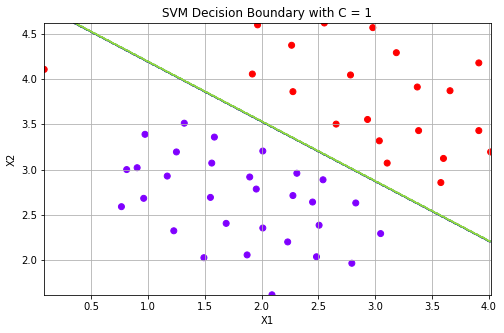

<Figure size 576x360 with 0 Axes>

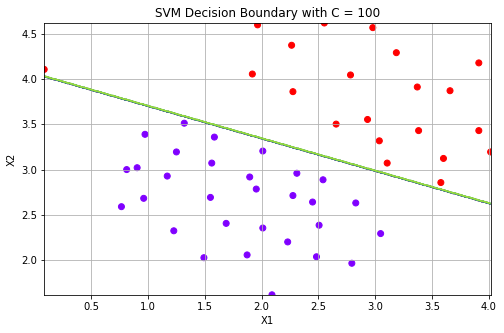

In [10]:
title = ['SVM Decision Boundary with C = {}'.format(C) for C in [1, 100]]
for model,title in zip(models,title):
    plt.figure(figsize=(8,5))
    plotData(X, y)
    plotBoundary(model, X)
    plt.title(title)

通过比较两次outliers的分类，我们发现：当C比较大，也就是lambda比较小时，惩罚项较弱，导致overfit

## 2. Non-linear boundary and Gaussian Kernel

### Data Manipulation

In [11]:
data2 = loadmat("data2.mat")

In [12]:
X2 = data2["X"]
y2 = data2["y"]
X2.shape,y2.shape

((863, 2), (863, 1))

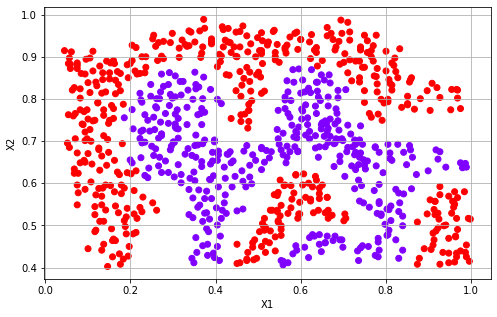

In [13]:
plotData(X2,y2)

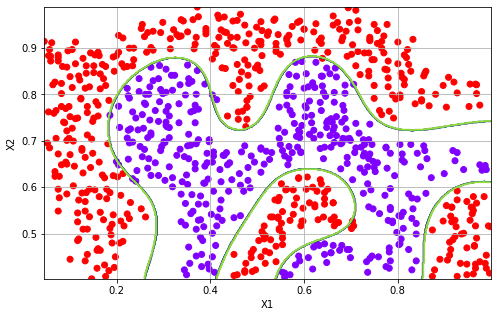

In [14]:
sigma = 0.1
gamma = 1/(2*sigma**2)
clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)
model2 = clf.fit(X2, y2.ravel())
plotData(X2, y2)
plotBoundary(model2, X2)

In [15]:
model2.decision_function(X2).shape #show the theta for kernel features

(863,)

## 3. Choose the best C and sigma for SVM

### Data Manipulation

In [16]:
data3 = loadmat("data3.mat")
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [17]:
X3,y3 = data3["X"],data3["y"]
Xval,yval = data3["Xval"],data3["yval"]
X3.shape,y3.shape
Xval.shape,yval.shape

((211, 2), (211, 1))

((200, 2), (200, 1))

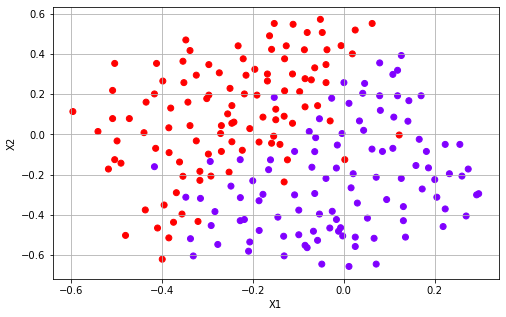

In [18]:
plotData(X3,y3)

### Choose C and sigma

In [19]:
C_values = (0.01,0.03,0.1,0.3,1,3,10,30)
sigma_values = C_values
best_pair, Min_error = (0,0),1000

for C in C_values:
    for sigma in sigma_values:
        gamma = 1/(2*sigma**2)
        SVM_tem = svm.SVC(C=C,kernel="rbf",gamma=gamma)
        model_tem = SVM_tem.fit(X3,y3.ravel())
        predict = model_tem.predict(Xval)
        Error = np.mean(np.double(predict!=yval.ravel()))
        if Error < Min_error:
            Min_error = Error
            best_pair = (C,sigma)
print("best_pair = {} and Min_error = {}".format(best_pair,Min_error))

best_pair = (1, 0.1) and Min_error = 0.035


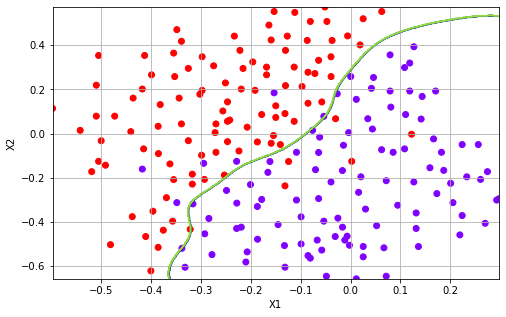

In [20]:
best_SVM = svm.SVC(C=1,kernel="rbf",gamma=1/(2*0.1**2))
best_model = best_SVM.fit(X3,y3.ravel())
plotData(X3,y3)
plotBoundary(best_model,X3)

### Appendix：Gaussian Kernels

In [21]:
def gaussKernel(x1,x2,sigma):
    return np.exp(-(np.sum(np.power((x1-x2),2)))/(2*sigma**2))
gaussKernel(np.array([1,2,1]),np.array([0,4,-1]),2)

0.32465246735834974